## Chi-Square (\(\chi^2\)) :To find best fit models in Cosmology

**Aim of the Tutorial:**
- Learn how to quantify the likelihood that a set of data follow from a given model
- Find the set of model parameters that maximize this likelihood
- Learn about the \(\chi^2\) parameter and how it relates to this likelihood


## Let us get some data already stored in out computer. First we import some important libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Lets start with some data and plot it

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<ErrorbarContainer object of 3 artists>

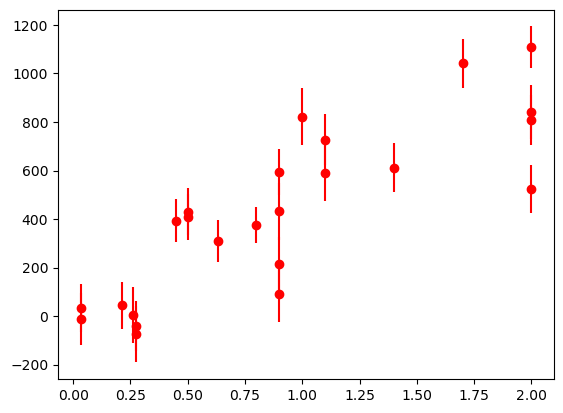

In [2]:
data = np.genfromtxt(r"C:\Users\hp\Downloads\Data Files\data (1).dat", names='x, y, ey')

plt.errorbar(data['x'], data['y'], yerr=data['ey'], fmt='ro')

## Lets say that there exists a relationship between x and y. Lets say it is a linear relation.We can try some combination

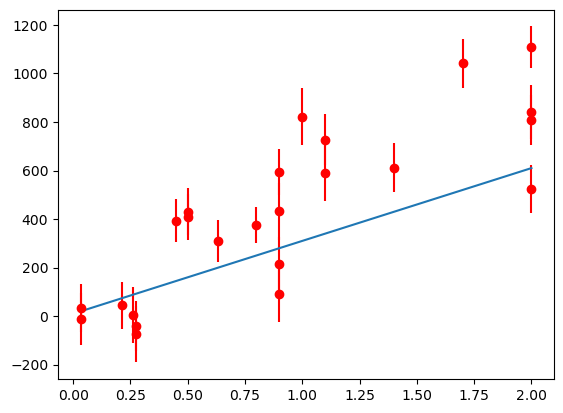

In [3]:
data = np.genfromtxt(r"C:\Users\hp\Downloads\Data Files\data (1).dat", names='x, y, ey')
plt.errorbar(data['x'], data['y'], yerr=data['ey'], fmt='ro')
plt.plot(data['x'],300*data['x']+10)

## We can play with different values and find the values so that we get a best fit line.

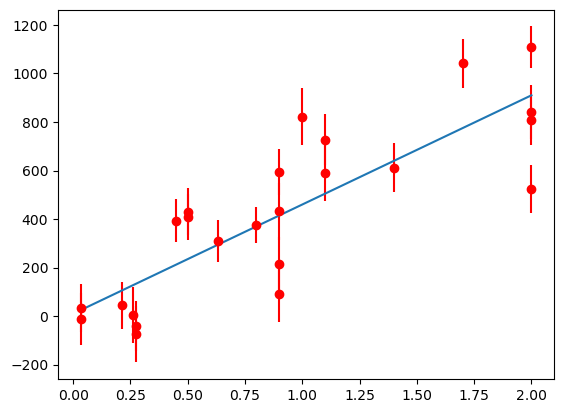

In [4]:
data = np.genfromtxt(r"C:\Users\hp\Downloads\Data Files\data (1).dat", names='x, y, ey')
plt.errorbar(data['x'], data['y'], yerr=data['ey'], fmt='ro')
plt.plot(data['x'],450*data['x']+10)

## So we assume that indeed there is some kind of relatioship between x and y and these y values have been drawn from that model relationship, but there are some random uncertainties. Then the question is what is the probability of finding a particular y at a given distance from the model predicted value???
## So we assume that these measurements here follow a gaussian distribution and these error bars are a measure of the standard deviation of the Gaussian. Then the problem reduces to finding the probability of a measurement certain standard deviations away from its predicted value

If we assume the data are normally (=Gaussian) distributed about the model, then the (relative) probability of measuring a data point, ${\rm data}_i$, that deviates some amount from the model prediction, ${\rm model}_i$, is:

$$ P({\rm data}_i) = {1 \over \sqrt{2\pi\sigma_i^2}} e^{ -\Delta Y_i^2 / 2 \sigma_i^2 } $$

where:
- $\Delta Y_i$ is ${\rm data}_i - {\rm model}_i$
- $\sigma_i$ is the uncertainty in the $i^{\rm th}$ measurement

- $\Delta Y_i$ is the measure of deviation of the value from model predicted value and P represents the probability of $\Delta Y_i$ being some $\sigma$ away from the model value

Now this is the probability for one data point. We need to find the total probability for all the data points

## Total probability

The total probability of getting a set of data, $I$, given a model, $\theta$, is the product of the individual probabilities of each data point:

$$P\left(I \,\middle| \, \theta \right) = \prod_i {1 \over \sqrt{2\pi\sigma_i^2}} e^{ -\Delta Y_i^2 / 2 \sigma_i^2 }$$

So this represents multiplicative sum of probabilities of each data point 

where in:
- $P\left(I \,\middle| \, \theta \right)$ , I represents the data and
- $\theta$  represents the given model parameters

The technical term for this probability is the "likelihood", and it is often written with a fancy L instead of the P:

$${\cal L}\left(I \,\middle| \, \theta \right)$$

**This is the likelihood of getting these data given some model.**

## It is often easier to work with the natural log of the likelihood

$$\ln {\cal L}\left(I \,\middle| \, \theta \right) =
-{1 \over 2}\left[ \sum_i \ln 2\pi\sigma_i^2 + \sum_i{ \left( { \Delta Y_i \over \sigma_i} \right)^2 } \right] $$

Because likelihood,P is a product and are difficult to work with however, if we take log of products we get sum.

Ignoring the first term (which does not depend on the model), we see that:
$$\ln {\cal L}\left(I \,\middle| \, \theta \right) \sim  -{1 \over 2} \sum_i{ \left( { \Delta Y_i \over \sigma_i} \right)^2 }$$

So we have changed the product to sum. 

This sum has a special name, it is called the $\chi^2$.

## The $\chi^2$ (chi-squared) value

$$\chi^2 = \sum_i{ \left( { \Delta Y_i \over \sigma_i} \right)^2 }$$

## Relation between likelihood and $\chi^2$

The (relative) probability of randomly drawing a specific sample of data given a model is related to the $\chi^2$ of the data given the model:

$${\cal L}\left(I \,\middle| \, \theta \right) \sim  e^{-\chi^2 / 2}$$


In other words, the set of parameters that **minimizes** the $\chi^2$ defines the model that **maximizes** the likelihood that the data were drawn from said model.

## $\chi^2$ minimization (= likelihood maximization)


This what we have been doing with our least-squares fitting, but there are other ways to look at this problem.

For example, we can write a function to return the $\chi^2$ value for a set of data given some model parameters, and then adjust the model parameters to minimize the $\chi^2$.

## Lets calculate the $\chi^2$ value for our data and model

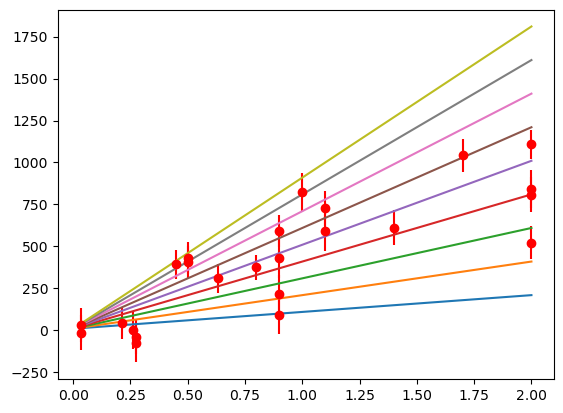

In [5]:
# define the model (y = mx + b) params is a tuple/array 
def linemodel(params, x):
    y = params[0]*x+params[1]
    return y

plt.errorbar(data['x'], data['y'], yerr=data['ey'], fmt='ro')  
for i in range(1, 10):
    plt.plot(data['x'], linemodel((i*100, 10), data['x']))

In [6]:
def get_chisq(params, data):
    model = linemodel(params,data['x'])
    dY = data['y']-model
    chisq=np.sum((dY/data['ey'])**2)
    return chisq

99.75484926736428


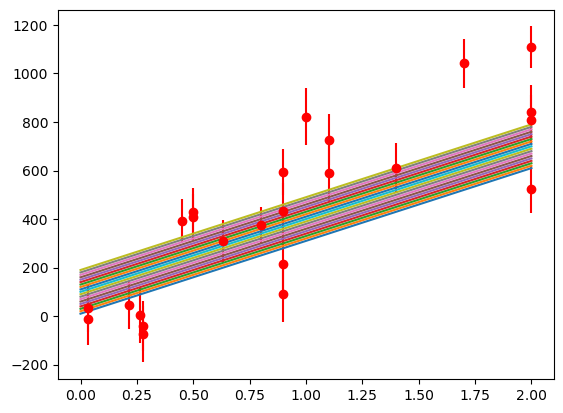

In [7]:
plt.errorbar(data['x'], data['y'], yerr=data['ey'], fmt='ro')
chisqs = []

for i in range(1, 20):
    params = 300, i*10
    modelx = np.linspace(0,2,50)
    modely = linemodel(params, modelx)
    plt.plot(modelx, modely);
    chisq = get_chisq(params, data)
    chisqs.append(chisq)

print(min(chisqs))

In [8]:
likelihood = np.exp(-chisq/2)
print("likelihood:", likelihood)

likelihood: 1.1259388122190415e-22


In [9]:
# params = 300,10
# modelx = np.linspace(0,2,50)
# modely = linemodel(params,modelx)
# plt.errorbar(data['x'], data['y'], yerr=data['ey'], fmt='ro')
# plt.plot(modelx, modely);
# chisq = get_chisq(params, data)
# plt.annotate(r"$\chi^2 = {:.2f}$".format(chisq), xy=(0, 1100), fontsize=18)


In [10]:
# params = 450,10
# modelx = np.linspace(0,2,50)
# modely = linemodel(params,modelx)
# plt.errorbar(data['x'], data['y'], yerr=data['ey'], fmt='ro')
# plt.plot(modelx, modely);
# chisq = get_chisq(params, data)
# plt.annotate(r"$\chi^2 = {:.2f}$".format(chisq), xy=(0, 1100), fontsize=18)
